### Test Case - Forest Cover Dataset
To run the code, make sure you set up the right path to these files:

`Motley.py SpatialKnn.py Evaluate.py`

The Forest Cover dataset can be obtained here:

`https://archive.ics.uci.edu/ml/datasets/covertype`

All the codes are tested on Python3.6 platform.

These are packages requried other than python's standard library:

```
numpy, scipy
scikit-learn (sklearn)
nltk
pandas
```

In [3]:
# Read in the required files
exec(open("./../Python_Code/Motley.py").read())
exec(open("./../Python_Code/SpatialKnn.py").read())
exec(open("./../Python_Code/Evaluate.py").read())

In [4]:
# Additional Library Required
from sklearn.preprocessing import minmax_scale
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Test Case: Forest Cover
dataset_path = "./../dataset/Forest_Cover/covtype.data"
r = np.genfromtxt(dataset_path, delimiter=',', dtype=None, names=None)

In [6]:
# Generate attribute matrix (normalized to [0, 1] range)
# Spatial attributes: Horizontal/Vertical Distance to Water
# Diversity attributes: Elevation, Aspect, Slope 
indices_spatial = (3, 4)
data_whole = minmax_scale(r[::, (0, 1, 2, 3, 4)], copy=False)
data_space = minmax_scale(r[::, (3, 4)], copy=False)
data_attributes = minmax_scale(r[::, (0, 1, 2)], copy=False)

/Users/hpy-kenny/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [7]:
# Test 1: General KNN, which does not separate spatial space and diversity space

# Index build-up: MOTLEY
finder_motley = Motley(idx_method="kdtree")
finder_motley.datafeed(data_whole, data_whole)

# Index build-up: Normal KNN
finder_k = KDTreeKnn()
finder_k.datafeed(data_whole, data_whole)

In [8]:
# Generate random test data
rand_1 = np.random.uniform(0.0, 1.0, size=(80, 1))
rand_2 = np.random.uniform(0.0, 1.0, size=(80, 1))
rand_3 = np.random.uniform(0.0, 1.0, size=(80, 1))
rand_4 = np.random.uniform(0.0, 1.0, size=(80, 1))
rand_5 = np.random.uniform(0.0, 1.0, size=(80, 1))

test_input_whole = np.hstack([rand_1, rand_2, rand_3, rand_4, rand_5])  

In [9]:
results_round1 = {"Direct": [],
                  "Greedy_MeanDist_2": [], "Greedy_MeanDist_3": [], "Greedy_MeanDist_5": [],
                  "Greedy_MinDist_2": [], "Greedy_MinDist_3": [], "Greedy_MinDist_5": [],
                  "Motley_010": [], "Motley_030": [], "Motley_050": []}
print("Test1_1: Normal KNN")
for q in test_input_whole:
    results_round1["Direct"].append(finder_k.search_direct(q))
    
print("Test1_2: SimpleGreedy + MeanDist in (2k)")
for q in test_input_whole:
    results_round1["Greedy_MeanDist_2"].append(finder_k.search_greedy(q, search_magnitude=2, set_dist="mean"))

print("Test1_3: SimpleGreedy + MeanDist in (3k)")
for q in test_input_whole:
    results_round1["Greedy_MeanDist_3"].append(finder_k.search_greedy(q, search_magnitude=3, set_dist="mean"))
    
print("Test1_4: SimpleGreedy + MeanDist in (5k)")
for q in test_input_whole:
    results_round1["Greedy_MeanDist_5"].append(finder_k.search_greedy(q, search_magnitude=5, set_dist="mean"))
    
print("Test1_5: SimpleGreedy + MinDist in (2k)")
for q in test_input_whole:
    results_round1["Greedy_MinDist_2"].append(finder_k.search_greedy(q, search_magnitude=2, set_dist="min"))

print("Test1_6: SimpleGreedy + MinDist in (3k)")
for q in test_input_whole:
    results_round1["Greedy_MinDist_3"].append(finder_k.search_greedy(q, search_magnitude=3, set_dist="min"))
    
print("Test1_7: SimpleGreedy + MinDist in (5k)")
for q in test_input_whole:
    results_round1["Greedy_MinDist_5"].append(finder_k.search_greedy(q, search_magnitude=5, set_dist="min"))
    
print("Test1_8: Motley threshold=0.01")
for q in test_input_whole:
    finder_motley.threshold = 0.01
    results_round1["Motley_010"].append(finder_motley.search(q))
    
print("Test1_9: Motley threshold=0.03")
for q in test_input_whole:
    finder_motley.threshold = 0.03
    results_round1["Motley_030"].append(finder_motley.search(q))
    
print("Test1_10: Motley threshold=0.05")
for q in test_input_whole:
    finder_motley.threshold = 0.05
    results_round1["Motley_050"].append(finder_motley.search(q))


Test1_1: Normal KNN
Test1_2: SimpleGreedy + MeanDist in (2k)
Test1_3: SimpleGreedy + MeanDist in (3k)
Test1_4: SimpleGreedy + MeanDist in (5k)
Test1_5: SimpleGreedy + MinDist in (2k)
Test1_6: SimpleGreedy + MinDist in (3k)
Test1_7: SimpleGreedy + MinDist in (5k)
Test1_8: Motley threshold=0.01
Test1_9: Motley threshold=0.03
Test1_10: Motley threshold=0.05


In [10]:
# Test 2: Separate spatial space and diversity space

# Index build-up: MOTLEY
finder_motley = Motley(idx_method="kdtree")
finder_motley.datafeed(data_space, data_attributes)

# Index build-up: Normal KNN
finder_k = KDTreeKnn()
finder_k.datafeed(data_space, data_attributes)

In [11]:
# Use the same test dataset
test_input_spatial = np.hstack([rand_1, rand_2])
test_input_diversity = np.hstack([rand_3, rand_4, rand_5]) 

In [12]:
results_round2 = {"Direct": [],
                  "Greedy_MeanDist_2": [], "Greedy_MeanDist_3": [], "Greedy_MeanDist_5": [],
                  "Greedy_MinDist_2": [], "Greedy_MinDist_3": [], "Greedy_MinDist_5": [],
                  "Motley_010": [], "Motley_030": [], "Motley_050": []}

print("Test2_1: Normal KNN")
for q in test_input_spatial:
    results_round2["Direct"].append(finder_k.search_direct(q))
    
print("Test2_2: SimpleGreedy + MeanDist in (2k)")
for q in test_input_spatial:
    results_round2["Greedy_MeanDist_2"].append(finder_k.search_greedy(q, search_magnitude=2, set_dist="mean"))

print("Test2_3: SimpleGreedy + MeanDist in (3k)")
for q in test_input_spatial:
    results_round2["Greedy_MeanDist_3"].append(finder_k.search_greedy(q, search_magnitude=3, set_dist="mean"))
    
print("Test2_4: SimpleGreedy + MeanDist in (5k)")
for q in test_input_spatial:
    results_round2["Greedy_MeanDist_5"].append(finder_k.search_greedy(q, search_magnitude=5, set_dist="mean"))
    
print("Test2_5: SimpleGreedy + MinDist in (2k)")
for q in test_input_spatial:
    results_round2["Greedy_MinDist_2"].append(finder_k.search_greedy(q, search_magnitude=2, set_dist="min"))

print("Test2_6: SimpleGreedy + MinDist in (3k)")
for q in test_input_spatial:
    results_round2["Greedy_MinDist_3"].append(finder_k.search_greedy(q, search_magnitude=3, set_dist="min"))
    
print("Test2_7: SimpleGreedy + MinDist in (5k)")
for q in test_input_spatial:
    results_round2["Greedy_MinDist_5"].append(finder_k.search_greedy(q, search_magnitude=5, set_dist="min"))
    
print("Test2_8: Motley threshold=0.01")
for q in test_input_spatial:
    finder_motley.threshold = 0.01
    results_round2["Motley_010"].append(finder_motley.search(q))
    
print("Test2_9: Motley threshold=0.03")
for q in test_input_spatial:
    finder_motley.threshold = 0.03
    results_round2["Motley_030"].append(finder_motley.search(q))
    
print("Test2_10: Motley threshold=0.05")
for q in test_input_spatial:
    finder_motley.threshold = 0.05
    results_round2["Motley_050"].append(finder_motley.search(q))

Test2_1: Normal KNN
Test2_2: SimpleGreedy + MeanDist in (2k)
Test2_3: SimpleGreedy + MeanDist in (3k)
Test2_4: SimpleGreedy + MeanDist in (5k)
Test2_5: SimpleGreedy + MinDist in (2k)
Test2_6: SimpleGreedy + MinDist in (3k)
Test2_7: SimpleGreedy + MinDist in (5k)
Test2_8: Motley threshold=0.01
Test2_9: Motley threshold=0.03
Test2_10: Motley threshold=0.05


In [18]:
# Compute (1)Max dist from query, (2)average dist from query, (3)average pairwise distance
results_g1 = []
for test_name in results_round1:
    md, ad, apd = [], [], []
    for idx, cand in enumerate(results_round1[test_name]):
        tmp_res = evaluation(test_input_spatial[idx], data_space[cand], data_attributes[cand])
        md.append(tmp_res[0])
        ad.append(tmp_res[1])
        apd.append(tmp_res[2])
    results_g1.append((np.mean(md), np.mean(ad), np.mean(apd)))

results_g2 = []
for test_name in results_round2:
    md, ad, apd = [], [], []
    for idx, cand in enumerate(results_round2[test_name]):
        tmp_res = evaluation(test_input_spatial[idx], data_space[cand], data_attributes[cand])
        md.append(tmp_res[0])
        ad.append(tmp_res[1])
        apd.append(tmp_res[2])
    results_g2.append((np.mean(md), np.mean(ad), np.mean(apd)))

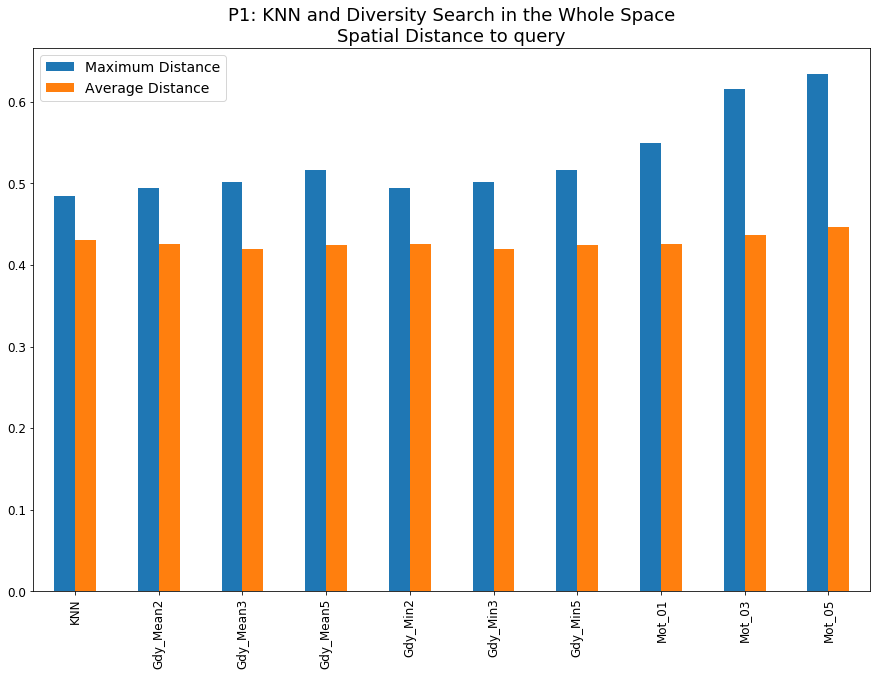

In [35]:
idexes = ('KNN', 'Gdy_Mean2', 'Gdy_Mean3', 'Gdy_Mean5', 'Gdy_Min2', 'Gdy_Min3', 'Gdy_Min5', 'Mot_01', 'Mot_03', 'Mot_05')
d = {'Maximum Distance': [x[0] for x in results_g1], 'Average Distance': [x[1] for x in results_g1]}
df = pd.DataFrame(data=d, index=idexes)

ax = df[['Maximum Distance','Average Distance']].plot(kind='bar', title ="P1: KNN and Diversity Search in the Whole Space\nSpatial Distance to query", figsize=(15, 10), legend=True, fontsize=12)
ax.title.set_size(18)
plt.legend(prop={'size': 14})

plt.show()


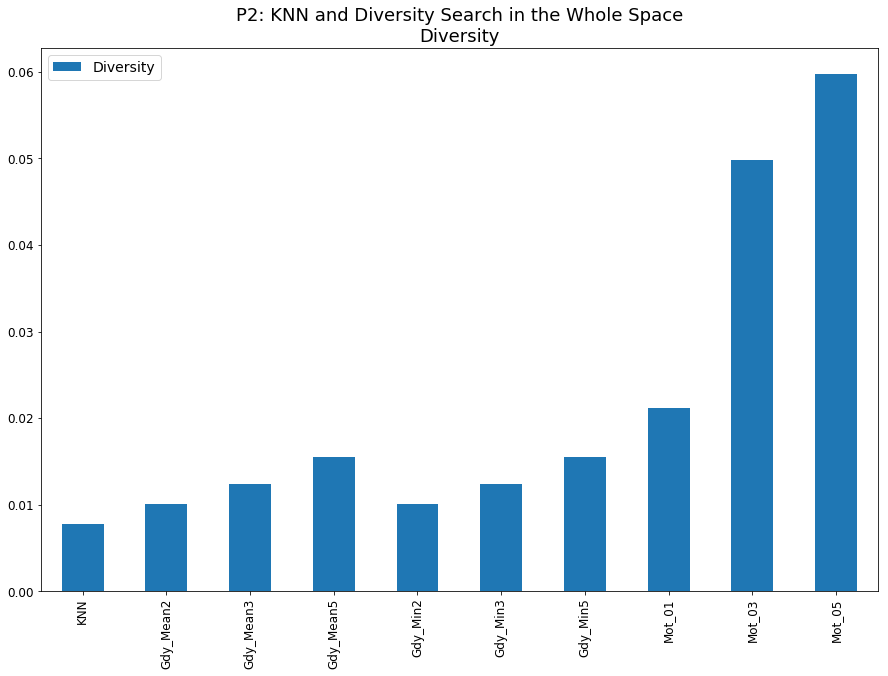

In [36]:
idexes = ('KNN', 'Gdy_Mean2', 'Gdy_Mean3', 'Gdy_Mean5', 'Gdy_Min2', 'Gdy_Min3', 'Gdy_Min5', 'Mot_01', 'Mot_03', 'Mot_05')
d = {'Diversity': [x[2] for x in results_g1]}
df = pd.DataFrame(data=d, index=idexes)

ax = df[['Diversity']].plot(kind='bar', title ="P2: KNN and Diversity Search in the Whole Space\nDiversity", figsize=(15, 10), legend=True, fontsize=12)
ax.title.set_size(18)
plt.legend(prop={'size': 14})

plt.show()

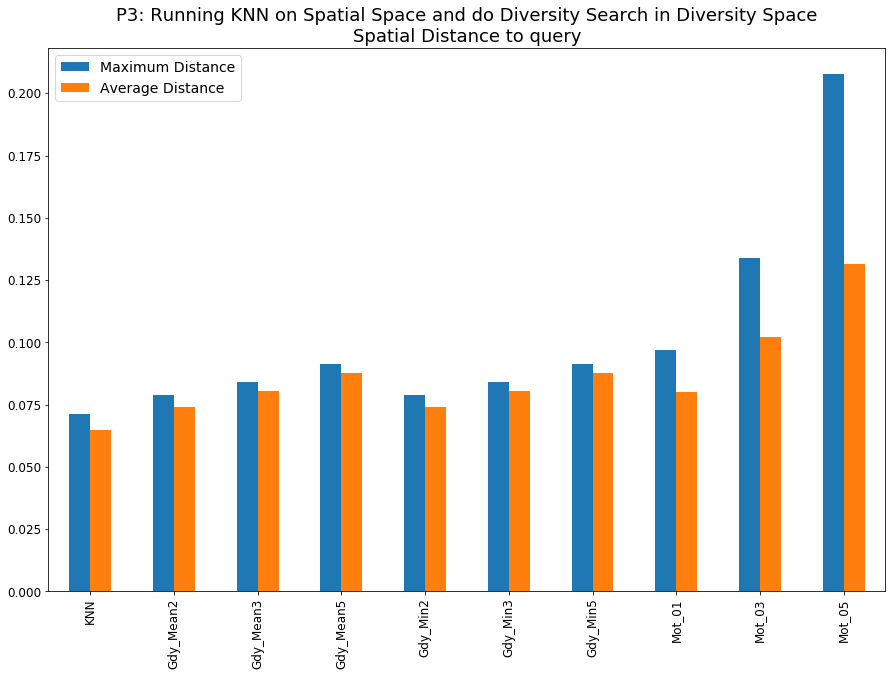

In [37]:
idexes = ('KNN', 'Gdy_Mean2', 'Gdy_Mean3', 'Gdy_Mean5', 'Gdy_Min2', 'Gdy_Min3', 'Gdy_Min5', 'Mot_01', 'Mot_03', 'Mot_05')
d = {'Maximum Distance': [x[0] for x in results_g2], 'Average Distance': [x[1] for x in results_g2]}
df = pd.DataFrame(data=d, index=idexes)

ax = df[['Maximum Distance','Average Distance']].plot(kind='bar', title ="P3: Running KNN on Spatial Space and do Diversity Search in Diversity Space\nSpatial Distance to query", figsize=(15, 10), legend=True, fontsize=12)
ax.title.set_size(18)
plt.legend(prop={'size': 14})

plt.show()

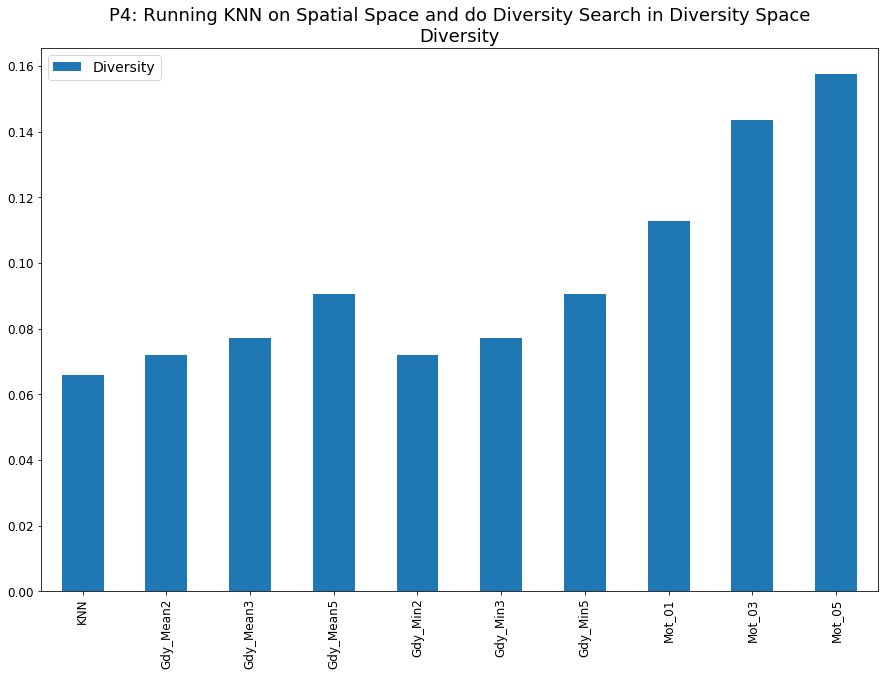

In [39]:
idexes = ('KNN', 'Gdy_Mean2', 'Gdy_Mean3', 'Gdy_Mean5', 'Gdy_Min2', 'Gdy_Min3', 'Gdy_Min5', 'Mot_01', 'Mot_03', 'Mot_05')
d = {'Diversity': [x[2] for x in results_g2]}
df = pd.DataFrame(data=d, index=idexes)

ax = df[['Diversity']].plot(kind='bar', title ="P4: Running KNN on Spatial Space and do Diversity Search in Diversity Space\nDiversity", figsize=(15, 10), legend=True, fontsize=12)
ax.title.set_size(18)
plt.legend(prop={'size': 14})

plt.show()